In [1]:
# Import Libraries and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing



/Users/hinalpanchal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the data and cleaning

disease_data = pd.read_csv('Heart Disease Predictions.csv')

disease_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
disease_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
#find the missing values
disease_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#drop the missing values
disease_data.dropna(inplace=True)

In [6]:
#No missing values found
disease_data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
# Since we need only columns that are important we drop the education column

disease_data.drop(columns=['education'], inplace=True, axis=1)

In [8]:
disease_data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
disease_data.rename(columns={'male':'Gender_Male'}, inplace=True)

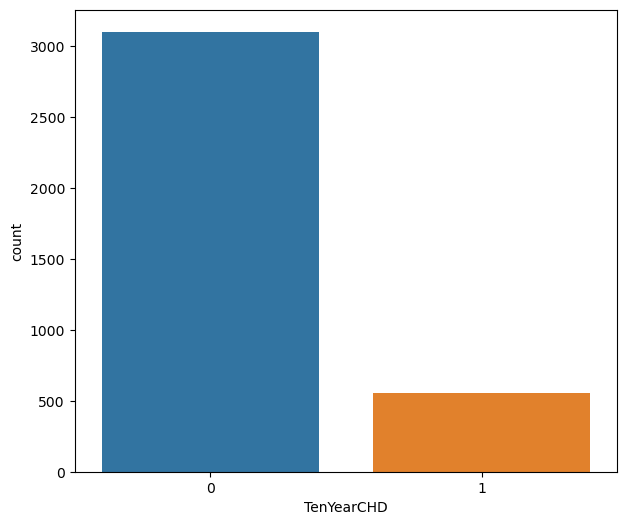

In [23]:
# chart that shows the count of people that have heart disease(1) vs who donot have heart disease(0)

plt.figure(figsize=(7,6))
sns.countplot(x='TenYearCHD', data=disease_data)
plt.show()

#orange(1) are the people with heart disease
#blue(0) are the people with no disease

In [16]:

# Select features and target
X = disease_data[['age', 'Gender_Male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']].values
y = disease_data['TenYearCHD'].values

# Standardize X
X = preprocessing.StandardScaler().fit(X).transform(X)

In [17]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=5)

In [18]:
#fitting the model for prediction
from sklearn.linear_model import LogisticRegression

LogisticRegr= LogisticRegression()
LogisticRegr.fit(X_train, y_train)

y_prediction = LogisticRegr.predict(X_test)


In [21]:
#Evaluate the model on accuracy score

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction)

print('Accuracy of the model is :', accuracy)

Accuracy of the model is : 0.8624772313296903


In [27]:
# Confusion Matrix 
# Helping us understand how well the model distinguishes between positive and negative cases
from sklearn.metrics import confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_prediction)

In [28]:
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_prediction))

Confusion Matrix:
[[934   9]
 [142  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       943
           1       0.59      0.08      0.15       155

    accuracy                           0.86      1098
   macro avg       0.73      0.54      0.54      1098
weighted avg       0.83      0.86      0.82      1098



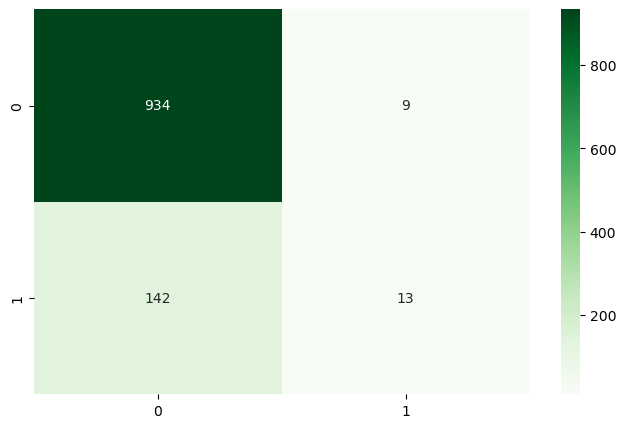

In [29]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

The model performs well at prediction of no heart disease(0) but poorly predicts heart disease(1) which results in imbalance classification performance.